### IMAGENET MODEL PLOTTING TRAIN AND PRED 

In [72]:
%matplotlib inline

Found 1 images belonging to 1 classes.
(224, 224, 3)


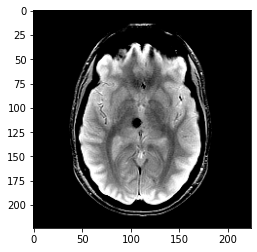

In [499]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

image_size=224
batch_size=1
source_dir='/Users/emiliekibsgaard/desktop/Research_Project_local/pic'

rand_seed=123
# if you want to save the images set save_dir to a directory and save_formay to the format you want otherwise leave these values as None

test_gen=ImageDataGenerator(rescale = 1./255)



test_gen = test_gen.flow_from_directory(directory = '/Users/emiliekibsgaard/desktop/Research_Project_local/pic',
                target_size=(image_size, image_size), 
                batch_size=batch_size, 
                shuffle = True,
                color_mode='rgb',
                seed=rand_seed)




batch=next(test_gen)  # returns the next batch of images and labels 
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print(img.shape)
plt.imshow(img)   # shows the first image


1/1 [==============================] - 1s 571ms/step
(1, 224, 224, 3)
<class 'numpy.ndarray'>


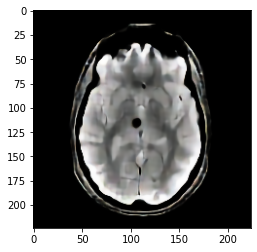

In [501]:
model = keras.models.load_model('imagenet_trail_1.h5') 
pred = model.predict(test_gen)
print(pred.shape)
print(type(pred))
for i in pred:
    plt.imshow(i)
    plt.imsave('brain_imagenet.png', i)

In [475]:
plt.imsave('parrot_imagenet.png', pred)

int_array = np.array(pred)
print(pred[0,:,:,:].shape)
print(pred.shape)
print(pred[:,:,:,0])
print('I AM NEW')
print(pred[:,:,:,1])
print('I AM NEW')
print(pred[:,:,:,2])


img_path='/Users/emiliekibsgaard/desktop/Research_Project_local/pic/pictures/kodim23.png' #dog
# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(224, 224,3))
# Convert ht image to Array of dimension (150,150,3)
x   = img_to_array(img)                           
x   = x.reshape((1,) + x.shape)
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

### RADIMAGENET MODEL PLOTTING TRAIN AND PRED 

1/1 [==============================] - 1s 587ms/step
(1, 224, 224, 3)
<class 'numpy.ndarray'>


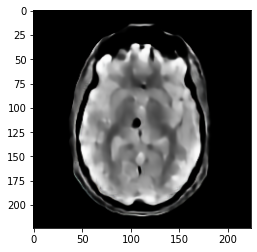

In [503]:
model = keras.models.load_model('imagenet_trail_radimagenet.h5') 
pred =model.predict(test_gen)
print(pred.shape)
print(type(pred))

for i in pred:
    plt.imshow(i)
    plt.imsave('brain_radimagenet.png', i)

(4, 224, 224, 3)
[[[1.65284348e+02 1.86307510e+02 1.93313522e+02 ... 6.89429092e+01
   7.66108551e+01 8.20986023e+01]
  [1.73500076e+02 1.93563293e+02 1.99013580e+02 ... 7.27434464e+01
   7.52929153e+01 7.99907913e+01]
  [1.72868164e+02 1.91465027e+02 1.97076324e+02 ... 7.65543976e+01
   7.46459122e+01 7.86283340e+01]
  ...
  [1.48867310e+02 1.59983902e+02 1.74715240e+02 ... 1.07381310e+02
   1.33829254e+02 1.34270248e+02]
  [1.53465851e+02 1.68451309e+02 1.83859741e+02 ... 7.91462326e+01
   9.23077545e+01 9.85570908e+01]
  [1.48452789e+02 1.61571411e+02 1.70775024e+02 ... 1.84010696e+01
   3.24397240e+01 4.62040787e+01]]

 [[1.35266275e+01 1.20573044e+01 8.11853409e+00 ... 3.22006559e+00
   1.64654386e+00 4.66125822e+00]
  [1.61716156e+01 1.17133398e+01 7.42557335e+00 ... 4.67262077e+00
   1.34541726e+00 2.60253882e+00]
  [2.37166290e+01 1.23271475e+01 6.49406052e+00 ... 2.66343188e+00
   1.01249254e+00 4.40994501e+00]
  ...
  [1.33701000e+01 1.16161413e+01 3.86733890e+00 ... 2.833330

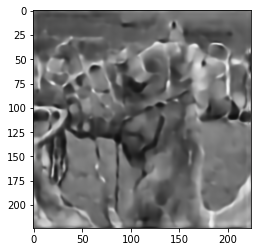

In [489]:
print(pred.shape)
print(pred[:,:,:,0]*255)
print('I AM NEW')
print(pred[:,:,:,1]*255)
print('I AM NEW')
print(pred[:,:,:,2]*255)
plt.imshow(pred[3,:,:,:])
plt.imsave('parrot_radimagenet.png', i)

In [384]:
int_array = np.array(pred)
pred.shape
int_array

array([[[[5.30455969e-02, 5.57762012e-02, 6.75036386e-02],
         [4.72835451e-02, 4.49425615e-02, 5.06918132e-02],
         [3.18373889e-02, 3.12957279e-02, 3.22718211e-02],
         ...,
         [1.26277078e-02, 1.26678422e-02, 1.22479545e-02],
         [6.45703496e-03, 6.95505226e-03, 6.31717499e-03],
         [1.82794444e-02, 1.90513097e-02, 1.59467403e-02]],

        [[6.34180978e-02, 6.21343628e-02, 6.77920431e-02],
         [4.59346659e-02, 4.81929965e-02, 4.84834053e-02],
         [2.91198958e-02, 2.87642963e-02, 2.80029345e-02],
         ...,
         [1.83240026e-02, 1.98352002e-02, 1.90312471e-02],
         [5.27614634e-03, 4.68627783e-03, 5.18511143e-03],
         [1.02060344e-02, 9.58459638e-03, 1.01695722e-02]],

        [[9.30063874e-02, 8.98960531e-02, 8.54674727e-02],
         [4.83417548e-02, 5.29041179e-02, 5.14740348e-02],
         [2.54669040e-02, 2.47629900e-02, 2.59073395e-02],
         ...,
         [1.04448311e-02, 9.64552443e-03, 1.00237811e-02],
         [

In [243]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import os
import numpy as np
import matplotlib.pyplot as plt


1/1 [==============================] - 1s 578ms/step
(1, 224, 224, 256)


/Users/emiliekibsgaard/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


(1, 224, 224, 256)
(1, 112, 112, 256)
(1, 112, 112, 128)
(1, 112, 112, 128)
(1, 56, 56, 128)
(1, 56, 56, 64)
(1, 56, 56, 64)
(1, 28, 28, 64)
(1, 28, 28, 32)
(1, 28, 28, 32)
(1, 56, 56, 32)
(1, 56, 56, 64)
(1, 56, 56, 64)
(1, 112, 112, 64)
(1, 112, 112, 128)
(1, 112, 112, 128)
(1, 224, 224, 128)
(1, 224, 224, 256)
(1, 224, 224, 256)
(1, 224, 224, 3)


/Users/emiliekibsgaard/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


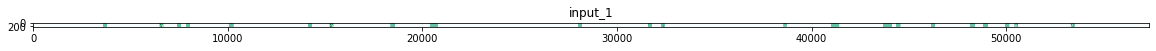

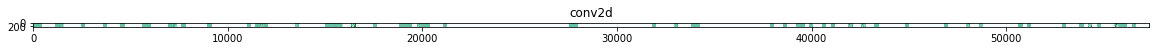

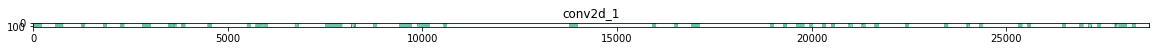

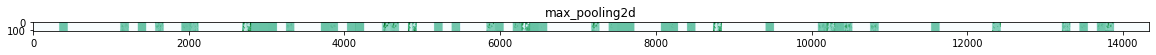

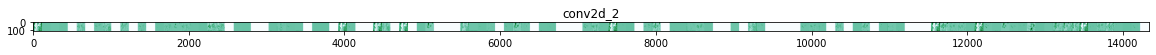

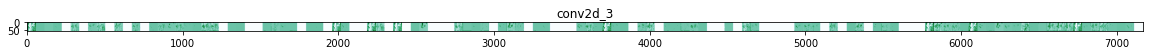

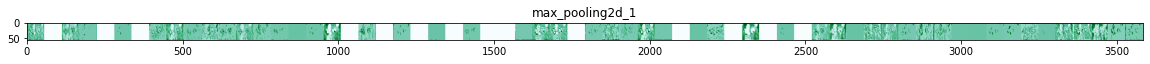

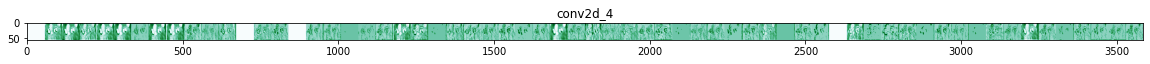

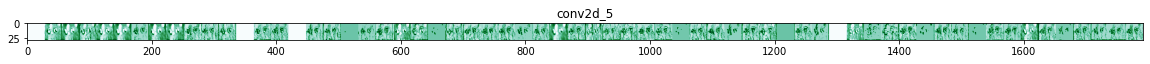

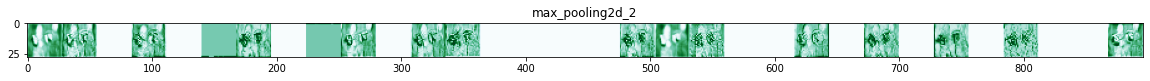

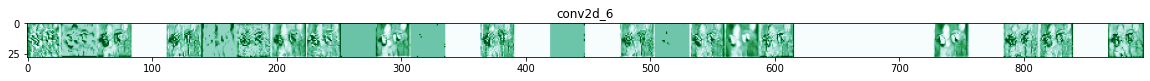

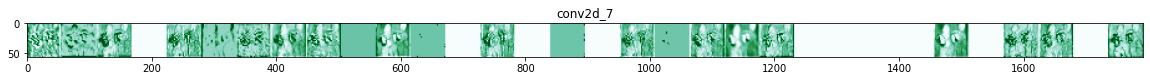

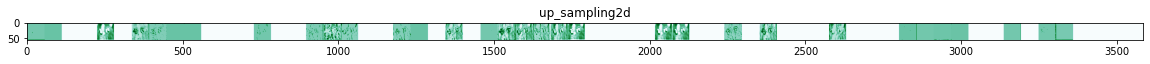

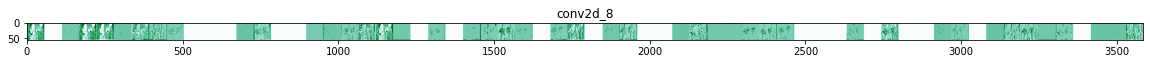

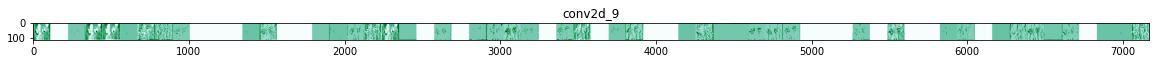

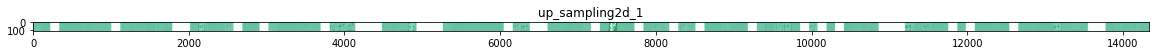

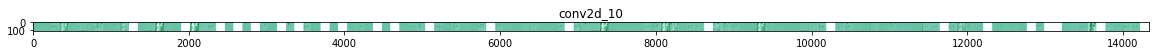

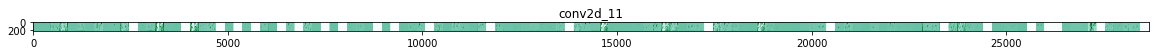

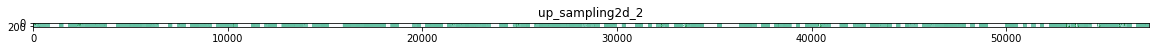

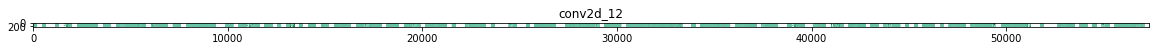

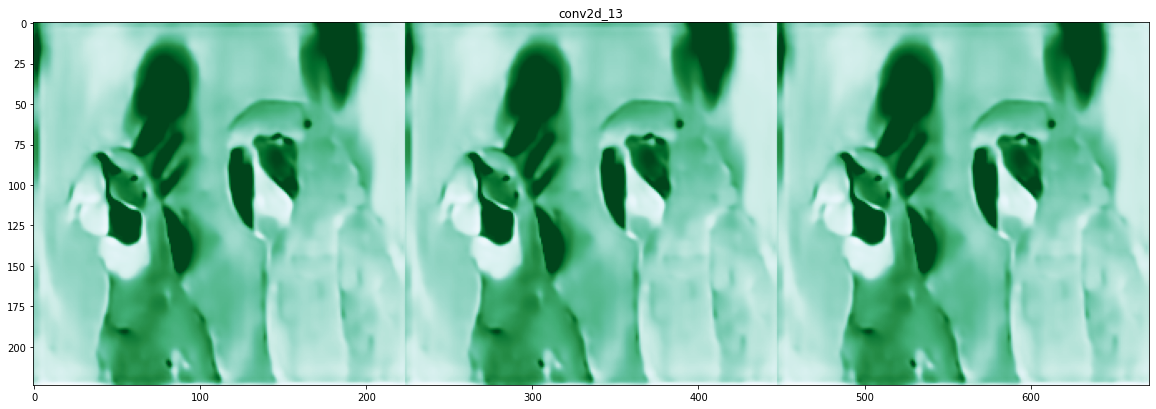

In [428]:
img_path='/Users/emiliekibsgaard/desktop/Research_Project_local/pic/pictures/kodim23.png' #dog
# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(224, 224,3))
# Convert ht image to Array of dimension (150,150,3)
x   = img_to_array(img)                           
x   = x.reshape((1,) + x.shape)
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='BuGn')

In [444]:
pred.shape[3]

3

In [510]:
import cv2
import matplotlib.pyplot as plt

# Load the images
img1 = cv2.imread('/Users/emiliekibsgaard/desktop/brain_imagenet.png')
img2 = cv2.imread('/Users/emiliekibsgaard/desktop/brain_radimagenet.png')

In [521]:
from skimage.metrics import structural_similarity
import cv2
import numpy as np

# Load images
before = cv2.imread('/Users/emiliekibsgaard/desktop/brain_radimagenet.png')
after = cv2.imread('/Users/emiliekibsgaard/desktop/brain_imagenet.png')

# Convert images to grayscale
before_gray = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
after_gray = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)

# Compute SSIM between the two images
(score, diff) = structural_similarity(before_gray, after_gray, full=True)
print("Image Similarity: {:.4f}%".format(score * 100))

# The diff image contains the actual image differences between the two images
# and is represented as a floating point data type in the range [0,1] 
# so we must convert the array to 8-bit unsigned integers in the range
# [0,255] before we can use it with OpenCV
diff = (diff * 255).astype("uint8")
diff_box = cv2.merge([diff, diff, diff])

# Threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

mask = np.zeros(before.shape, dtype='uint8')
filled_after = after.copy()

for c in contours:
    area = cv2.contourArea(c)
    if area > 40:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(before, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.rectangle(after, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.rectangle(diff_box, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.drawContours(mask, [c], 0, (255,255,255), -1)
        cv2.drawContours(filled_after, [c], 0, (0,255,0), -1)

cv2.imshow('before', before)
cv2.imshow('after', after)
cv2.imshow('diff', diff)
cv2.imshow('diff_box', diff_box)
cv2.imshow('mask', mask)
cv2.imshow('filled after', filled_after)
cv2.waitKey()

NameError: name 'structural_similarity' is not defined